# Importing Libs

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import kaleido
import statsmodels.stats.api as sms
import statsmodels.api as sm
from matplotlib import rcParams
import statsmodels.formula.api as smf
from statsmodels.nonparametric.smoothers_lowess import lowess
import scipy.stats as stat
import plotly.express as px
import pickle

In [59]:
import warnings
warnings.filterwarnings('ignore')

# Loading Datasets

In [60]:
path_data = r'D:\ECM\DigitalLab\Projet_2\final_data\data_analysis.csv'
data_analysis = pd.read_csv(path_data)
data_analysis = data_analysis.drop(['Unnamed: 0'], axis = 1)

In [61]:
path_data_1 = r'D:\ECM\DigitalLab\Projet_2\final_data\final_data.csv'
data = pd.read_csv(path_data_1)
data = data.drop(['Unnamed: 0'], axis = 1)

# Model

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204534 entries, 0 to 204533
Data columns (total 42 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id_projet                  204534 non-null  object 
 1   Nombre_pret                204534 non-null  int64  
 2   CA_REMISE_T                204534 non-null  float64
 3   situ_globale               204534 non-null  object 
 4   type_residence_1           204534 non-null  object 
 5   NB_PARTENAIRES             204534 non-null  float64
 6   LI_DESTN_FINCT             204534 non-null  object 
 7   nb_mois_dernier_entretien  204534 non-null  float64
 8   type_ptf_cc                204534 non-null  object 
 9   PNB                        204534 non-null  float64
 10  TP_VU_M12                  204534 non-null  float64
 11  NB_CONX_BAM_12M            204534 non-null  float64
 12  NB_CONX_WEB_12M            204534 non-null  float64
 13  MT_ENC_EP_BILAN            20

In [63]:
data = data.dropna()

# Flux

In [64]:
np.unique(data['BARCODE'])

array([0, 1, 2], dtype=int64)

In [65]:
data4 = data[data['BARCODE'] != 2]

In [66]:
db_plot = data4.groupby('BARCODE').count().reset_index().sort_values(['id_projet'], ascending=False)
color = ['rgb(26, 140, 255)', 'rgb(77, 77, 255)', 'rgb(0, 0, 179)']
db_plot['BARCODE'] = db_plot['BARCODE'].astype(str)
fig = px.bar(db_plot, x='BARCODE', y='id_projet',color = 'BARCODE',labels={"BARCODE": "Barcodes"},color_discrete_sequence=color)
fig.show()

In [67]:
x,y =  'BARCODE', 'DT_SIGNER_CTR_CRED'

df1 = data4.groupby(y)[x].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

df1[x] = df1[x].astype(str)

color = ['rgb(26, 140, 255)', 'rgb(77, 77, 255)', 'rgb(0, 0, 179)']
fig = px.bar(df1, x=y, y='percent', color = x, color_discrete_sequence=color)
fig.show()

In [68]:
data4 = data4[data4['DT_SIGNER_CTR_CRED'] > 2014]

### t-test

In [69]:
l_column = ['Nombre_pret','CA_REMISE_T', 'NB_PARTENAIRES', 'nb_mois_dernier_entretien', 'PNB', 'NB_CONX_BAM_12M', 
        'NB_CONX_WEB_12M','MT_ENC_EP_BILAN','MT_ENC_COLLECTE','NB_MVT_DBTR__DAV_12M','SLD_COMPTA_DAV','MT_VERSE_EPRGN_DSOUSC',
            'SLD_MOY_DBIT_12_MOIS','SLD_MOY_CRDT_12_MOIS','N_TP_CREDIT_IMMO', 'N_TP_EPARGNE_ASS_VIE','N_TP_PROJET',
           'N_TP_CARTES', 'AGE','ANCIENNETE_MOIS','TX_CRED','DUREE_RESTANTE','MT_ACCORDE_PRET_PAR_CR','MT_PROCH_ECHCE_THRQ']
#

for col in l_column :
    ss_dt1 = data4[col][data4['BARCODE'] == 0]
    ss_dt2 = data4[col][data4['BARCODE'] == 1]

    cm = sms.CompareMeans(sms.DescrStatsW(ss_dt1), sms.DescrStatsW(ss_dt2))
    print(col)
    print(cm.summary(usevar='unequal'))
    print('-------------------------------------------')

Nombre_pret
                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1      0.0277      0.012      2.317      0.021       0.004       0.051
-------------------------------------------
CA_REMISE_T
                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1  -6056.9664    284.852    -21.264      0.000   -6615.420   -5498.512
-------------------------------------------
NB_PARTENAIRES
                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subs

In [70]:
fig = px.box(data4, x = 'AGE', color = 'BARCODE', color_discrete_sequence=color)
fig.show()

In [71]:
data4 = data4.drop(['NB_PARTENAIRES','SLD_MOY_DBIT_12_MOIS', 'N_TP_PROJET','MT_PROCH_ECHCE_THRQ',
                    'AGE', 'NB_CONX_BAM_12M'], axis = 1)

### Test du Khi²

In [72]:
from scipy.stats import chi2_contingency


cate_columuns = ['LI_DESTN_FINCT','LI_REGRP_CSP','situ_globale','type_residence_1', 'SEGMT','DT_SIGNER_CTR_CRED',
                    'TP_VU_M12', 'type_ptf_cc', 'TP_CREDIT_CONSO', 'TP_EPARGNE_BILANTIELLE',
                 'TP_GDECES', 'TP_PJ','TP_PROTECTION_PERSONNES','TP_AUTO','TP_PROTECTION_BIENS','TP_ASSURANCE']

for col in cate_columuns:
    df_count = pd.crosstab(data4['BARCODE'], data4[col])
    Khi2_obs, p_value, ddl, effectif_theorique = chi2_contingency(df_count)
    print(col)
    print(p_value)
    print('-------------------------------------------')

LI_DESTN_FINCT
6.934541909031001e-56
-------------------------------------------
LI_REGRP_CSP
2.976639828767624e-243
-------------------------------------------
situ_globale
1.3299689606711361e-37
-------------------------------------------
type_residence_1
5.547574377036669e-26
-------------------------------------------
SEGMT
6.008194695453817e-45
-------------------------------------------
DT_SIGNER_CTR_CRED
4.9703530706897085e-92
-------------------------------------------
TP_VU_M12
0.13810344513052747
-------------------------------------------
type_ptf_cc
8.612193459209752e-13
-------------------------------------------
TP_CREDIT_CONSO
5.288801069031703e-48
-------------------------------------------
TP_EPARGNE_BILANTIELLE
3.603195273297001e-20
-------------------------------------------
TP_GDECES
3.0792286286071014e-103
-------------------------------------------
TP_PJ
1.0977691840488914e-116
-------------------------------------------
TP_PROTECTION_PERSONNES
1.3083589725021992e

In [73]:
data4 = data4.drop(['TP_VU_M12'], axis = 1)

### Label Encoding

In [74]:
all_columns = ['LI_DESTN_FINCT','LI_REGRP_CSP','type_residence_1', 'SEGMT', 'situ_globale','type_ptf_cc']

from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

LE = {col : LabelEncoder() for col in all_columns}
for col in all_columns :
    data4[col] =  LE[col].fit_transform(data4[col])

In [75]:
data4['DT_SIGNER_CTR_CRED'] = data4['DT_SIGNER_CTR_CRED'].apply(lambda x : 2021 - x)

In [76]:
data4 = data4.drop(['id_projet'], axis = 1)

In [77]:
data4.head()

,Nombre_pret,CA_REMISE_T,situ_globale,type_residence_1,LI_DESTN_FINCT,nb_mois_dernier_entretien,type_ptf_cc,PNB,NB_CONX_WEB_12M,MT_ENC_EP_BILAN,...,N_TP_CARTES,LI_REGRP_CSP,SEGMT,ANCIENNETE_MOIS,TX_CRED,DUREE_RESTANTE,MT_ACCORDE_PRET_PAR_CR,MT_VERSE_EPRGN_DSOUSC,DT_SIGNER_CTR_CRED,BARCODE
2,2,5006.14,3,1,2,10.0,0,-137.12,128.0,4138.09,...,1.0,6,1,207.0,1.44,261.0,120340.0,1200.0,3,0
3,2,5006.14,3,1,2,1.0,0,-90.97,190.0,1046.63,...,1.0,6,1,219.0,1.44,261.0,120340.0,1200.0,3,0
4,2,5006.14,3,3,2,1.0,0,217.57,175.0,1724.03,...,1.0,6,2,230.0,1.44,261.0,120340.0,1200.0,3,0
10,2,5699.69,3,2,2,4.0,0,1184.04,300.0,2683.42,...,1.0,4,2,204.0,1.44,273.0,111322.0,595.0,2,0
11,2,5699.69,3,3,2,9.0,0,842.97,429.0,1333.49,...,1.0,4,1,216.0,1.44,273.0,111322.0,1135.0,2,0


### Feature Selection

In [78]:
y = data4['BARCODE'].values
X = data4.drop('BARCODE', axis = 1)

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train1, x_test1, y_train1, y_test1 = train_test_split(X, y , test_size = 0.2, random_state = 0)

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(x_train1, y_train1)

SelectFromModel(estimator=RandomForestClassifier())

In [81]:
sel.get_support()

array([False,  True, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True, False])

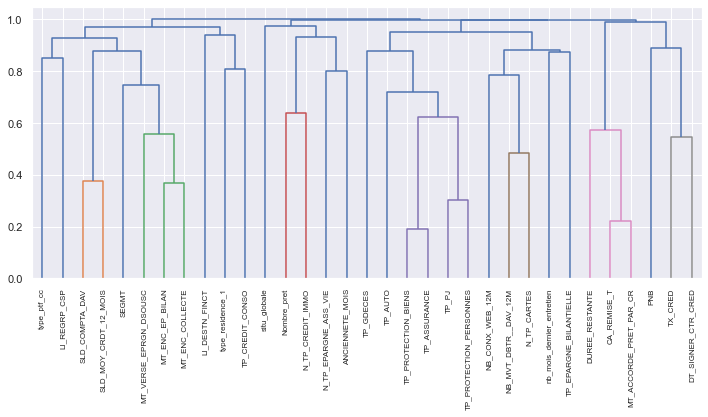

In [82]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform

correlations = X.corr()

plt.figure(figsize=(12,5))

dissimilarity = 1 - abs(correlations)
Z = linkage(squareform(dissimilarity), 'complete')

dendrogram(Z, labels=X.columns, orientation='top', leaf_rotation=90);

In [83]:
selected_feat= x_train1.columns[(sel.get_support())]
len(selected_feat)

13

In [84]:
print(selected_feat)

Index(['CA_REMISE_T', 'PNB', 'NB_CONX_WEB_12M', 'MT_ENC_EP_BILAN',
       'MT_ENC_COLLECTE', 'NB_MVT_DBTR__DAV_12M', 'SLD_COMPTA_DAV',
       'SLD_MOY_CRDT_12_MOIS', 'ANCIENNETE_MOIS', 'TX_CRED', 'DUREE_RESTANTE',
       'MT_ACCORDE_PRET_PAR_CR', 'MT_VERSE_EPRGN_DSOUSC'],
      dtype='object')


In [85]:
X1 = X[selected_feat]

### Correlation 

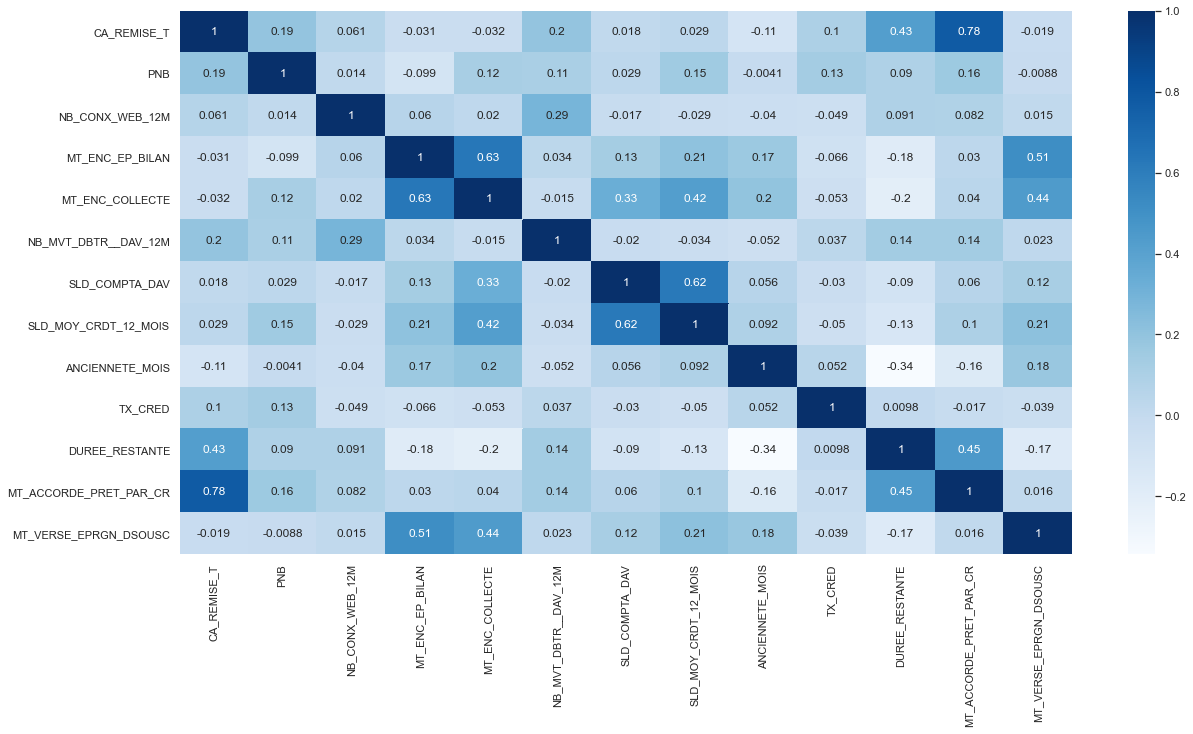

In [86]:
sns.set_style("darkgrid")
fig = plt.figure(figsize = (20, 10))
matrix = X1.corr()
dataplot = sns.heatmap(matrix, cmap="Blues", annot=True)
plt.show()

In [87]:
X1

,CA_REMISE_T,PNB,NB_CONX_WEB_12M,MT_ENC_EP_BILAN,MT_ENC_COLLECTE,NB_MVT_DBTR__DAV_12M,SLD_COMPTA_DAV,SLD_MOY_CRDT_12_MOIS,ANCIENNETE_MOIS,TX_CRED,DUREE_RESTANTE,MT_ACCORDE_PRET_PAR_CR,MT_VERSE_EPRGN_DSOUSC
2,5006.14,-137.12,128.0,4138.09,4189.09,471.0,0.00,689.0,207.0,1.44,261.0,120340.0,1200.00
3,5006.14,-90.97,190.0,1046.63,2884.52,489.0,1786.89,727.0,219.0,1.44,261.0,120340.0,1200.00
4,5006.14,217.57,175.0,1724.03,3216.22,488.0,1441.19,879.0,230.0,1.44,261.0,120340.0,1200.00
10,5699.69,1184.04,300.0,2683.42,6284.81,653.0,886.30,1114.0,204.0,1.44,273.0,111322.0,595.00
11,5699.69,842.97,429.0,1333.49,4894.92,607.0,487.66,710.0,216.0,1.44,273.0,111322.0,1135.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204527,10919.22,1974.08,254.0,7185.00,13935.77,1016.0,6648.77,3471.0,9.0,1.16,294.0,246762.0,1047.00
204530,26134.07,0.01,66.0,0.00,83.22,24.0,83.22,21.0,4.0,1.34,299.0,245427.0,0.00
204531,962.88,738.73,33.0,27883.72,87727.02,754.0,1115.58,9609.0,216.0,1.34,299.0,272535.0,17090.00
204532,52570.82,2021.17,233.0,55896.94,63112.48,584.0,7215.54,8031.0,146.0,1.07,297.0,619391.0,27175.00


## Training Model

### 1er entrainement

In [88]:
X3 = X1.values

In [89]:
idx1 = np.where(y == 1)
idx0 = np.where(y == 0)

x_1 = X3[idx1[0]]
x_0 = X3[idx0[0]]

y_1 = y[idx1[0]]
y_0 = y[idx0[0]]

In [90]:
from sklearn.model_selection import train_test_split

x_train1, x_test_1, y_train1, y_test_1 = train_test_split(x_1, y_1 , test_size = 0.1, random_state = 4)

In [91]:
import random
l = [i for i in range(x_0.shape[0])]
idx_test = random.sample(l, x_test_1.shape[0])

In [92]:
x_test_0 = x_0[idx_test]
y_test_0 = y_0[idx_test]

In [93]:
x_test = np.concatenate((x_test_0, x_test_1), axis = 0)
y_test = np.concatenate((y_test_0, y_test_1), axis = 0)

In [94]:
x_train0 = np.delete(x_0, idx_test, 0)
y_train0 = np.delete(y_0, idx_test, 0)

In [95]:
x_train = np.concatenate((x_train0, x_train1), axis = 0)
y_train = np.concatenate((y_train0, y_train1), axis = 0)

### Feature Scaling 

In [96]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()

X_sc = sc.fit_transform(x_train)
x_test1 = sc.transform(x_test)

In [97]:
X_sc = pd.DataFrame(X_sc)
X_sc.columns = X1.columns

In [98]:
X_sc

,CA_REMISE_T,PNB,NB_CONX_WEB_12M,MT_ENC_EP_BILAN,MT_ENC_COLLECTE,NB_MVT_DBTR__DAV_12M,SLD_COMPTA_DAV,SLD_MOY_CRDT_12_MOIS,ANCIENNETE_MOIS,TX_CRED,DUREE_RESTANTE,MT_ACCORDE_PRET_PAR_CR,MT_VERSE_EPRGN_DSOUSC
0,-0.654901,-0.855328,-0.535343,-0.388712,-0.350795,-0.638335,-0.280328,-0.354650,0.242960,0.092781,0.859101,-0.420384,-0.347198
1,-0.654901,-0.821761,-0.278298,-0.455849,-0.362813,-0.594158,-0.214647,-0.352573,0.326608,0.092781,0.859101,-0.420384,-0.347198
2,-0.654901,-0.597340,-0.340486,-0.441138,-0.359757,-0.596612,-0.227354,-0.344266,0.403285,0.092781,0.859101,-0.420384,-0.347198
3,-0.595516,0.105634,0.177751,-0.420303,-0.331490,-0.191661,-0.247750,-0.331422,0.222048,0.092781,1.021922,-0.503577,-0.361375
4,-0.595516,-0.142448,0.712572,-0.449619,-0.344293,-0.304557,-0.262403,-0.353503,0.305696,0.092781,1.021922,-0.503577,-0.348721
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119372,0.425316,-0.753476,-0.294881,-0.128067,-0.202486,1.447778,-0.127830,-0.199539,-0.565637,0.183714,0.275657,1.020146,-0.368991
119373,-0.055871,-0.447242,-0.390237,-0.478579,-0.375289,-1.067829,-0.227830,-0.341315,-0.907200,0.001847,0.099267,0.073846,-0.375319
119374,2.646408,-0.632144,1.603940,-0.406346,-0.350633,1.945991,-0.251709,-0.287151,-0.865376,0.001847,0.112836,1.454108,-0.373678
119375,-0.791933,-1.601275,0.401630,-0.003155,-0.085499,-0.996655,-0.151386,-0.212001,-0.851434,-1.043887,-1.515380,0.416672,0.978568


In [99]:
X_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119377 entries, 0 to 119376
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CA_REMISE_T             119377 non-null  float64
 1   PNB                     119377 non-null  float64
 2   NB_CONX_WEB_12M         119377 non-null  float64
 3   MT_ENC_EP_BILAN         119377 non-null  float64
 4   MT_ENC_COLLECTE         119377 non-null  float64
 5   NB_MVT_DBTR__DAV_12M    119377 non-null  float64
 6   SLD_COMPTA_DAV          119377 non-null  float64
 7   SLD_MOY_CRDT_12_MOIS    119377 non-null  float64
 8   ANCIENNETE_MOIS         119377 non-null  float64
 9   TX_CRED                 119377 non-null  float64
 10  DUREE_RESTANTE          119377 non-null  float64
 11  MT_ACCORDE_PRET_PAR_CR  119377 non-null  float64
 12  MT_VERSE_EPRGN_DSOUSC   119377 non-null  float64
dtypes: float64(13)
memory usage: 11.8 MB


In [100]:
X33 = X_sc.values

In [101]:
idx1 = np.where(y_train == 1)
idx0 = np.where(y_train == 0)

x_train1 = X33[idx1[0]]
x_train0 = X33[idx0[0]]

y_train1 = y_train[idx1[0]]
y_train0 = y_train[idx0[0]]

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

classifier_S = SVC(kernel = 'linear', random_state = 0, C = 1)
classifier_V = SVC(kernel = 'rbf', random_state = 0, C = 1)
classifier_K = KNeighborsClassifier(n_neighbors = 15, metric = 'minkowski', p = 2)
classifier_R =  RandomForestClassifier(n_estimators = 15, criterion = 'entropy', random_state = 0)
classifier_L =  LogisticRegression()
classifier_E =  ExtraTreesClassifier(n_estimators = 100, random_state = 5)
classifier_X =  XGBClassifier()

Classifier = [classifier_S, classifier_V, classifier_R, classifier_K, classifier_L, classifier_E, classifier_X]

Name_Clf = ['Linear SVM', 'Kernel SVM', 'Random Forest', 'KNN' , 'Logistic Regression', 'Extratress', 'XgBoost']

In [103]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [104]:
def cross_validation(x_train0, y_train0, x_train1, y_train1, cls) : 
    precision = []
    recall = []
    f1 = []
    accurracy = []
    precision_average = []
    recall_average = []
    l = [i for i in range(x_train0.shape[0])]
    for k in range(10) :
        x_train_1, x_val_1, y_train_1, y_val_1 = train_test_split(x_train1, y_train1 , test_size = 0.2, random_state = 4)
        idx_train = random.sample(l, x_train_1.shape[0])
        l = [ele for ele in l if ele not in idx_train]
        idx_val = random.sample(l, x_val_1.shape[0])
        l = [ele for ele in l if ele not in idx_val]
        x_train_0 = x_train0[idx_train]
        y_train_0 = y_train0[idx_train]
        x_val_0 = x_train0[idx_val]
        y_val_0 = y_train0[idx_val]
        x_train = np.concatenate((x_train_0, x_train_1), axis = 0)
        y_train = np.concatenate((y_train_0, y_train_1), axis = 0)
        x_val = np.concatenate((x_val_0, x_val_1), axis = 0)
        y_val = np.concatenate((y_val_0, y_val_1), axis = 0)
        cls.fit(x_train, y_train)
        y_pred = cls.predict(x_val)
        precision.append(precision_score(y_val, y_pred))
        recall.append(recall_score(y_val, y_pred))
        f1.append(f1_score(y_val, y_pred))
        accurracy.append(accuracy_score(y_val, y_pred))
        precision_average.append(precision_score(y_val, y_pred, average = None))
        recall_average.append(recall_score(y_val, y_pred, average = None))
    return np.mean(precision), np.mean(recall), np.mean(f1), np.mean(accurracy)

In [105]:
Precision = []
Recall = []
F1 = []
Accurracy = []

for cls in Classifier :
    p, r, f, a = cross_validation(x_train0, y_train0, x_train1, y_train1, cls)
    Precision.append(p)
    Recall.append(r)
    F1.append(f)
    Accurracy.append(a)

[23:44:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:44:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:44:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:45:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [106]:
color4 = ['rgb(26, 140, 255)', 'rgb(77, 77, 255)', 'rgb(0, 0, 179)', 'rgb(204, 204, 255)', 'rgb(153, 235, 255)',
          'rgb(0, 133, 230)', 'rgb(0, 102, 128)']

In [107]:
pourcentage_data = pd.DataFrame()
pourcentage_data['Classifier'] = Name_Clf
pourcentage_data['Accuracy'] = Accurracy
pourcentage_data['Precision'] = Precision
pourcentage_data['Recall'] = Recall
pourcentage_data['F1'] = F1

In [108]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=2, shared_xaxes=True, subplot_titles = ['Accuracy', 'Precision', 'Recall', 'F1'])

fig.add_trace(
    go.Bar(x =pourcentage_data['Classifier'],
                y = pourcentage_data['Accuracy'],
               marker_color=color4),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x =pourcentage_data['Classifier'],
                y = pourcentage_data['Precision'],
               marker_color=color4),
    row=1, col=2
)

fig.add_trace(
    go.Bar(x =pourcentage_data['Classifier'],
                y = pourcentage_data['Recall'],
               marker_color=color4),
    row=2, col=1
)

fig.add_trace(
    go.Bar(x =pourcentage_data['Classifier'],
                y = pourcentage_data['F1'],
               marker_color=color4),
    row=2, col=2
)

fig.update_layout(height=800, width=950, title_text="Evalution des Classfieurs")
fig.show()

### Feature Importance

In [109]:
color5 = ['rgb(204, 204, 255)', 'rgb(77, 77, 255)', 'rgb(153, 235, 255)', 'rgb(0, 184, 230)', 'rgb(0, 102, 128)', 
         'rgb(0, 0, 179)', 'rgb(0, 0, 102)', 'rgb(26, 140, 255)', 'rgb(0, 133, 230)', 'rgb(128, 183, 255)', 'rgb(51, 102, 255)',
        'rgb(0, 13, 51)', 'rgb(230, 236, 255)', 'rgb(102, 179, 255)', 'rgb(0, 255, 255)', 'rgb(128, 255, 255)']

In [110]:
feature_importance = pd.DataFrame()
feature_importance['Columns'] = X_sc.columns
feature_importance['xgboost'] = classifier_X.feature_importances_
feature_importance['extratrees'] = classifier_E.feature_importances_
feature_importance['random_forest'] = classifier_R.feature_importances_
feature_importance['logistic_regression'] = classifier_L.coef_[0]

In [111]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=2, shared_xaxes=True, subplot_titles = ['xgboost', 'extratrees', 'r forest', 'l regresion'])

fig.add_trace(
    go.Bar(x =feature_importance['Columns'],
                y = feature_importance['xgboost'],
               marker_color=color5),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x =feature_importance['Columns'],
                y = feature_importance['extratrees'],
               marker_color=color5),
    row=1, col=2
)

fig.add_trace(
    go.Bar(x =feature_importance['Columns'],
                y = feature_importance['random_forest'],
               marker_color=color5),
    row=2, col=1
)

fig.add_trace(
    go.Bar(x =feature_importance['Columns'],
                y = feature_importance['logistic_regression'],
               marker_color=color5),
    row=2, col=2
)

fig.update_layout(height=800, width=950, title_text="Feature Importance")
fig.show()

### Deuxieme entrainement

In [112]:
X2 = X1.drop(['MT_ENC_COLLECTE','MT_ENC_EP_BILAN','SLD_MOY_CRDT_12_MOIS', 'MT_VERSE_EPRGN_DSOUSC',
                 'SLD_COMPTA_DAV'], axis = 1)

In [113]:
X3 = X2.values

In [114]:
idx1 = np.where(y == 1)
idx0 = np.where(y == 0)

x_1 = X3[idx1[0]]
x_0 = X3[idx0[0]]

y_1 = y[idx1[0]]
y_0 = y[idx0[0]]

In [115]:
from sklearn.model_selection import train_test_split

x_train1, x_test_1, y_train1, y_test_1 = train_test_split(x_1, y_1 , test_size = 0.1, random_state = 4)

In [116]:
import random
l = [i for i in range(x_0.shape[0])]
idx_test = random.sample(l, x_test_1.shape[0])

In [117]:
x_test_0 = x_0[idx_test]
y_test_0 = y_0[idx_test]

In [118]:
x_test = np.concatenate((x_test_0, x_test_1), axis = 0)
y_test = np.concatenate((y_test_0, y_test_1), axis = 0)

In [119]:
x_train0 = np.delete(x_0, idx_test, 0)
y_train0 = np.delete(y_0, idx_test, 0)

In [120]:
x_train = np.concatenate((x_train0, x_train1), axis = 0)
y_train = np.concatenate((y_train0, y_train1), axis = 0)

### Feature Scaling 

In [121]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()

X_sc = sc.fit_transform(x_train)
x_test1 = sc.transform(x_test)

In [122]:
X_sc = pd.DataFrame(X_sc)
X_sc.columns = X2.columns

In [123]:
X_sc

,CA_REMISE_T,PNB,NB_CONX_WEB_12M,NB_MVT_DBTR__DAV_12M,ANCIENNETE_MOIS,TX_CRED,DUREE_RESTANTE,MT_ACCORDE_PRET_PAR_CR
0,-0.654831,-0.855088,-0.535433,-0.638201,0.242987,0.092609,0.859734,-0.420056
1,-0.654831,-0.821517,-0.278381,-0.594028,0.326650,0.092609,0.859734,-0.420056
2,-0.654831,-0.597074,-0.340571,-0.596482,0.403341,0.092609,0.859734,-0.420056
3,-0.595417,0.105971,0.177679,-0.191568,0.222071,0.092609,1.022587,-0.503242
4,-0.595417,-0.142136,0.712514,-0.304453,0.305734,0.092609,1.022587,-0.503242
...,...,...,...,...,...,...,...,...
119372,0.425914,-0.753225,-0.294965,1.447722,-0.565758,0.183512,0.276179,1.020364
119373,-0.055508,-0.446960,-0.390323,-1.067655,-0.907382,0.001705,0.099755,0.074136
119374,2.648092,-0.631882,1.603904,1.945889,-0.865551,0.001705,0.113326,1.454293
119375,-0.791931,-1.601109,0.401563,-0.996488,-0.851607,-1.043687,-1.515201,0.416936


In [124]:
X_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119377 entries, 0 to 119376
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CA_REMISE_T             119377 non-null  float64
 1   PNB                     119377 non-null  float64
 2   NB_CONX_WEB_12M         119377 non-null  float64
 3   NB_MVT_DBTR__DAV_12M    119377 non-null  float64
 4   ANCIENNETE_MOIS         119377 non-null  float64
 5   TX_CRED                 119377 non-null  float64
 6   DUREE_RESTANTE          119377 non-null  float64
 7   MT_ACCORDE_PRET_PAR_CR  119377 non-null  float64
dtypes: float64(8)
memory usage: 7.3 MB


In [125]:
X33 = X_sc.values

In [126]:
idx1 = np.where(y_train == 1)
idx0 = np.where(y_train == 0)

x_train1 = X33[idx1[0]]
x_train0 = X33[idx0[0]]

y_train1 = y_train[idx1[0]]
y_train0 = y_train[idx0[0]]

In [127]:
Precision = []
Recall = []
F1 = []
Accurracy = []

for cls in Classifier :
    p, r, f, a = cross_validation(x_train0, y_train0, x_train1, y_train1, cls)
    Precision.append(p)
    Recall.append(r)
    F1.append(f)
    Accurracy.append(a)

[23:55:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:55:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:55:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:55:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [128]:
pourcentage_data = pd.DataFrame()
pourcentage_data['Classifier'] = Name_Clf
pourcentage_data['Accuracy'] = Accurracy
pourcentage_data['Precision'] = Precision
pourcentage_data['Recall'] = Recall
pourcentage_data['F1'] = F1

In [129]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=2, shared_xaxes=True, subplot_titles = ['Accuracy', 'Precision', 'Recall', 'F1'])

fig.add_trace(
    go.Bar(x =pourcentage_data['Classifier'],
                y = pourcentage_data['Accuracy'],
               marker_color=color4),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x =pourcentage_data['Classifier'],
                y = pourcentage_data['Precision'],
               marker_color=color4),
    row=1, col=2
)

fig.add_trace(
    go.Bar(x =pourcentage_data['Classifier'],
                y = pourcentage_data['Recall'],
               marker_color=color4),
    row=2, col=1
)

fig.add_trace(
    go.Bar(x =pourcentage_data['Classifier'],
                y = pourcentage_data['F1'],
               marker_color=color4),
    row=2, col=2
)

fig.update_layout(height=800, width=950, title_text="Evalution des Classfieurs")
fig.show()

### Feature Importance

In [130]:
feature_importance = pd.DataFrame()
feature_importance['Columns'] = X2.columns
feature_importance['xgboost'] = classifier_X.feature_importances_
feature_importance['extratrees'] = classifier_E.feature_importances_
feature_importance['random_forest'] = classifier_R.feature_importances_
feature_importance['logistic_regression'] = classifier_L.coef_[0]

In [131]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=2, shared_xaxes=True, subplot_titles = ['xgboost', 'extratrees', 'r forest', 'l regresion'])

fig.add_trace(
    go.Bar(x =feature_importance['Columns'],
                y = feature_importance['xgboost'],
               marker_color=color5),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x =feature_importance['Columns'],
                y = feature_importance['extratrees'],
               marker_color=color5),
    row=1, col=2
)

fig.add_trace(
    go.Bar(x =feature_importance['Columns'],
                y = feature_importance['random_forest'],
               marker_color=color5),
    row=2, col=1
)

fig.add_trace(
    go.Bar(x =feature_importance['Columns'],
                y = feature_importance['logistic_regression'],
               marker_color=color5),
    row=2, col=2
)

fig.update_layout(height=800, width=950, title_text="Feature Importance")
fig.show()

### Outliers Analysis 

In [132]:
from sklearn.ensemble import IsolationForest

In [133]:
X4 = X1.drop(['MT_ENC_COLLECTE','MT_ENC_EP_BILAN','SLD_MOY_CRDT_12_MOIS', 'MT_VERSE_EPRGN_DSOUSC',
                 'SLD_COMPTA_DAV'], axis = 1)

In [134]:
X4['BARCODE'] = y

In [135]:
model = IsolationForest(contamination = float(0.4))

DATA = []

l = [0, 1]

for j in l:
    iso_data = X4[X4['BARCODE'] == j]
    idxj = np.where(y == j)
    yj = y[idxj[0]]
    
    model.fit(iso_data)

    score = model.decision_function(iso_data.values)
    predict = model.predict(iso_data.values)
    
    iso_data['scores'] = score
    iso_data['anomaly'] = predict
    
    iso_data['BARCODE'] = yj
    
    iso_data = iso_data[iso_data['anomaly'] == 1]
    
    iso_data = iso_data.drop(['scores', 'anomaly'], axis = 1)
    
    DATA.append(iso_data)

X5 = pd.concat(DATA)

In [136]:
X5

,CA_REMISE_T,PNB,NB_CONX_WEB_12M,NB_MVT_DBTR__DAV_12M,ANCIENNETE_MOIS,TX_CRED,DUREE_RESTANTE,MT_ACCORDE_PRET_PAR_CR,BARCODE
2,5006.14,-137.12,128.0,471.0,207.0,1.44,261.0,120340.0,0
3,5006.14,-90.97,190.0,489.0,219.0,1.44,261.0,120340.0,0
4,5006.14,217.57,175.0,488.0,230.0,1.44,261.0,120340.0,0
10,5699.69,1184.04,300.0,653.0,204.0,1.44,273.0,111322.0,0
11,5699.69,842.97,429.0,607.0,216.0,1.44,273.0,111322.0,0
...,...,...,...,...,...,...,...,...,...
204173,8946.79,1867.67,272.0,1492.0,16.0,1.05,225.0,267070.0,1
204177,13374.72,573.47,191.0,209.0,26.0,1.04,279.0,300000.0,1
204283,12551.12,1353.12,378.0,882.0,20.0,1.41,284.0,214900.0,1
204506,5698.33,619.23,228.0,1160.0,167.0,1.55,195.0,93217.0,1


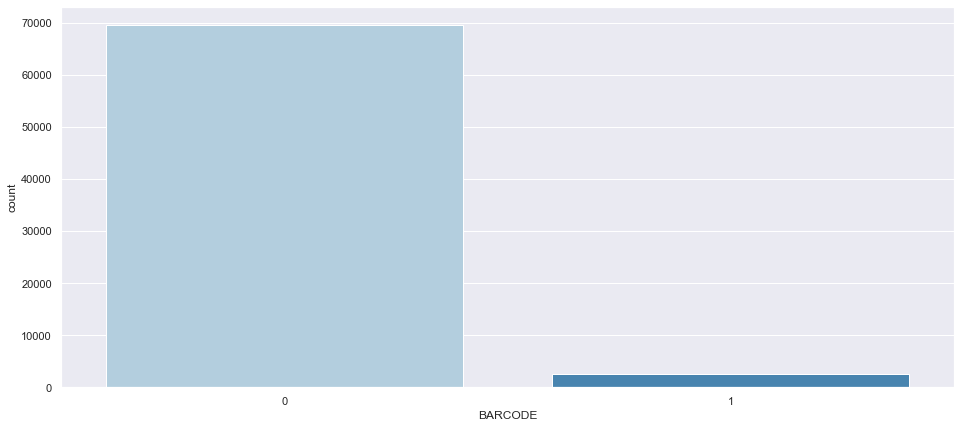

In [137]:
sns.set_style("darkgrid")
fig = plt.figure(figsize = (16, 7))
sns.countplot('BARCODE', data = X5, palette= "Blues")
plt.show()

### 3eme entrainement

In [138]:
X6 = X5.drop('BARCODE', axis = 1)
y = X5['BARCODE'].values

In [139]:
columnss = X6.columns

In [140]:
columnss

Index(['CA_REMISE_T', 'PNB', 'NB_CONX_WEB_12M', 'NB_MVT_DBTR__DAV_12M',
       'ANCIENNETE_MOIS', 'TX_CRED', 'DUREE_RESTANTE',
       'MT_ACCORDE_PRET_PAR_CR'],
      dtype='object')

In [141]:
X3 = X6.values

In [142]:
idx1 = np.where(y == 1)
idx0 = np.where(y == 0)

x_1 = X3[idx1[0]]
x_0 = X3[idx0[0]]

y_1 = y[idx1[0]]
y_0 = y[idx0[0]]

In [143]:
from sklearn.model_selection import train_test_split

x_train1, x_test_1, y_train1, y_test_1 = train_test_split(x_1, y_1 , test_size = 0.1, random_state = 4)

In [144]:
import random
l = [i for i in range(x_0.shape[0])]
idx_test = random.sample(l, x_test_1.shape[0])

In [145]:
x_test_0 = x_0[idx_test]
y_test_0 = y_0[idx_test]

In [146]:
x_test = np.concatenate((x_test_0, x_test_1), axis = 0)
y_test = np.concatenate((y_test_0, y_test_1), axis = 0)

In [147]:
x_train0 = np.delete(x_0, idx_test, 0)
y_train0 = np.delete(y_0, idx_test, 0)

In [148]:
x_train = np.concatenate((x_train0, x_train1), axis = 0)
y_train = np.concatenate((y_train0, y_train1), axis = 0)

### Feature Scaling 

In [149]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()

X_sc = sc.fit_transform(x_train)
x_test1 = sc.transform(x_test)

In [150]:
X_sc = pd.DataFrame(X_sc)
X_sc.columns = X6.columns

In [151]:
X_sc

,CA_REMISE_T,PNB,NB_CONX_WEB_12M,NB_MVT_DBTR__DAV_12M,ANCIENNETE_MOIS,TX_CRED,DUREE_RESTANTE,MT_ACCORDE_PRET_PAR_CR
0,-0.765800,-1.343979,-0.684436,-0.632732,0.593647,0.125360,0.902506,-0.436404
1,-0.765800,-1.286187,-0.238364,-0.578773,0.700527,0.125360,0.902506,-0.436404
2,-0.765800,-0.899816,-0.346285,-0.581771,0.798500,0.125360,0.902506,-0.436404
3,-0.671765,0.310452,0.553054,-0.087145,0.566928,0.125360,1.101996,-0.569992
4,-0.671765,-0.116655,1.481172,-0.225041,0.673807,0.125360,1.101996,-0.569992
...,...,...,...,...,...,...,...,...
71620,-0.811093,-1.376763,0.696948,0.209630,1.457592,-1.565525,-1.823859,-0.145171
71621,3.864874,-1.053944,-0.346285,-0.290991,-0.875950,-0.533799,1.451103,3.624782
71622,-0.417311,-0.696249,1.754571,-0.165086,-0.751257,-2.282002,-0.161441,-0.255443
71623,0.062954,0.524262,0.315629,0.374505,1.119140,-1.021003,-1.707490,1.039906


In [152]:
X_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71625 entries, 0 to 71624
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CA_REMISE_T             71625 non-null  float64
 1   PNB                     71625 non-null  float64
 2   NB_CONX_WEB_12M         71625 non-null  float64
 3   NB_MVT_DBTR__DAV_12M    71625 non-null  float64
 4   ANCIENNETE_MOIS         71625 non-null  float64
 5   TX_CRED                 71625 non-null  float64
 6   DUREE_RESTANTE          71625 non-null  float64
 7   MT_ACCORDE_PRET_PAR_CR  71625 non-null  float64
dtypes: float64(8)
memory usage: 4.4 MB


In [153]:
X33 = X_sc.values

In [154]:
idx1 = np.where(y_train == 1)
idx0 = np.where(y_train == 0)

x_train1 = X33[idx1[0]]
x_train0 = X33[idx0[0]]

y_train1 = y_train[idx1[0]]
y_train0 = y_train[idx0[0]]

In [155]:
pickle.dump(sc, open('scaler_flux.pkl','wb'))

In [156]:
Precision = []
Recall = []
F1 = []
Accurracy = []

for cls in Classifier :
    p, r, f, a = cross_validation(x_train0, y_train0, x_train1, y_train1, cls)
    Precision.append(p)
    Recall.append(r)
    F1.append(f)
    Accurracy.append(a)

[23:59:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:00:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:00:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:00:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [157]:
pourcentage_data = pd.DataFrame()
pourcentage_data['Classifier'] = Name_Clf
pourcentage_data['Accuracy'] = Accurracy
pourcentage_data['Precision'] = Precision
pourcentage_data['Recall'] = Recall
pourcentage_data['F1'] = F1

In [158]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=2, shared_xaxes=True, subplot_titles = ['Accuracy', 'Precision', 'Recall', 'F1'])

fig.add_trace(
    go.Bar(x =pourcentage_data['Classifier'],
                y = pourcentage_data['Accuracy'],
               marker_color=color4),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x =pourcentage_data['Classifier'],
                y = pourcentage_data['Precision'],
               marker_color=color4),
    row=1, col=2
)

fig.add_trace(
    go.Bar(x =pourcentage_data['Classifier'],
                y = pourcentage_data['Recall'],
               marker_color=color4),
    row=2, col=1
)

fig.add_trace(
    go.Bar(x =pourcentage_data['Classifier'],
                y = pourcentage_data['F1'],
               marker_color=color4),
    row=2, col=2
)

fig.update_layout(height=800, width=950, title_text="Evalution des Classfieurs")
fig.show()

# Grid Search

In [159]:
def grid_search(param, x_train0, y_train0, x_train1, y_train1, cls) :
    n = len(list(param.keys()))
    acc = []
    precision = []
    Recall = []
    F1 = []
    dict_all = []
    for i in range(100) :
        dict_pr = {}
        for j in range(n) :
            dict_pr[list(param.keys())[j]] = random.choice(param[list(param.keys())[j]])
        cls.set_params(**dict_pr)
        dict_all.append(dict_pr)
        pre, recall, f1, accuracy = cross_validation(x_train0, y_train0, x_train1, y_train1, cls)
        acc.append(accuracy)
        precision.append(pre)
        Recall.append(recall)
        F1.append(f1)
    return dict_all[max(acc)], acc[max(acc)]

### XGBOOST

In [160]:
parameters = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

parameters = {'gamma': 0,
 'learning_rate': 0.25,
 'max_depth': 13,
 'n_estimators': 115,
 'reg_alpha': 0.1,
 'reg_lambda': 0}

accuracy = 0.8214141414141414

### Random Forest

In [161]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

parameters = {'n_estimators': 1000,
 'max_features': 'auto',
 'max_depth': 110,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'bootstrap': False}

accuracy = 0.8371717171717172

### ExtraTrees

In [162]:
param_grid_ext = {
    'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
    'criterion': ['gini', 'entropy'],
    'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
    'min_sample_split': [2,4,6],
    'min_sample_leaf': [1,2],
    'oob_score': [True, False],
    'max_features': ['auto','sqrt','log2'],    
    'bootstrap': [True, False],
    'warm_start': [True, False],
}

parameters = {'n_estimators': 1800,
 'max_features': 'auto',
 'max_depth': 30,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'bootstrap': False}

accuracy = 0.8115151515151515

In [163]:
classifier_r = RandomForestClassifier()
dict_pr_r = {'n_estimators': 1000, 'max_features': 'auto', 'max_depth': 110, 'min_samples_split': 2, 
             'min_samples_leaf': 1, 'bootstrap': False}
classifier_r.set_params(**dict_pr_r)
classifier_e =  ExtraTreesClassifier()
dict_pr_e = {'n_estimators': 1800, 'max_features': 'auto', 'max_depth': 30, 'min_samples_split': 2, 
             'min_samples_leaf': 1, 'bootstrap': False}
classifier_e.set_params(**dict_pr_e)
classifier_x =  XGBClassifier()
dict_pr_x = {'gamma': 0, 'learning_rate': 0.25, 'max_depth': 13, 'n_estimators': 115, 'reg_alpha': 0.1, 'reg_lambda': 0}
classifier_x.set_params(**dict_pr_x)

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=0, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.25, max_delta_step=None, max_depth=13,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=115, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=0.1, reg_lambda=0,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [164]:
classifier = [classifier_r, classifier_e, classifier_x]

In [165]:
Precision = []
Recall = []
F1 = []
Accurracy = []

for cls in classifier :
    p, r, f, a = cross_validation(x_train0, y_train0, x_train1, y_train1, cls)
    Precision.append(p)
    Recall.append(r)
    F1.append(f)
    Accurracy.append(a)

[00:04:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:04:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:04:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:04:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [166]:
Name_Clf = ['Random Forest', 'Extratress', 'XgBoost']
pourcentage_data = pd.DataFrame()
pourcentage_data['Classifier'] = Name_Clf
pourcentage_data['Accuracy'] = Accurracy
pourcentage_data['Precision'] = Precision
pourcentage_data['Recall'] = Recall
pourcentage_data['F1'] = F1

In [167]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=2, shared_xaxes=True, subplot_titles = ['Accuracy', 'Precision', 'Recall', 'F1'])

fig.add_trace(
    go.Bar(x =pourcentage_data['Classifier'],
                y = pourcentage_data['Accuracy'],
               marker_color=color4),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x =pourcentage_data['Classifier'],
                y = pourcentage_data['Precision'],
               marker_color=color4),
    row=1, col=2
)

fig.add_trace(
    go.Bar(x =pourcentage_data['Classifier'],
                y = pourcentage_data['Recall'],
               marker_color=color4),
    row=2, col=1
)

fig.add_trace(
    go.Bar(x =pourcentage_data['Classifier'],
                y = pourcentage_data['F1'],
               marker_color=color4),
    row=2, col=2
)

fig.update_layout(height=800, width=950, title_text="Evalution des Classfieurs")
fig.show()

In [168]:
filename = 'random_forest_flux.sav'
pickle.dump(classifier_r, open(filename, 'wb'))
filename1 = 'extratrees_flux.sav'
pickle.dump(classifier_e, open(filename1, 'wb'))
filename2 = 'xgboost_flux.sav'
pickle.dump(classifier_x, open(filename2, 'wb'))

In [169]:
x_test2 = sc.inverse_transform(x_test1)
test = pd.DataFrame(x_test2)
test.columns = columnss
test['BARCODE'] = y_test

In [170]:
path_test = r'D:\ECM\DigitalLab\Projet_2\final_data\test_flux.csv'
test.to_csv(path_test)